## Utsha Khondkar

# Generate cluster data and visualize the output of C++/CUDA program

In [1]:
# imports needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import scipy.io
from skimage import io
from sklearn.datasets import make_blobs
import pandas as pd

## With the function below, you can generate input up to k = 10, with any N

In [2]:
def generateTestFile(filename = "input.csv", k = 3, N = 100, RANDOM_STATE = 42):
    center_candidates = [(-5, 7), (7, -1), (3, 11), (7, 15), (-1, 3), (-7, 0), (-7, -5), (-7, 15), (15, 10), (15, -5)]
    std = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
        # Generate some training data from clustering
    X, y = make_blobs(n_samples = N,
                      cluster_std = std[0:k],
                      centers = center_candidates[0:k],
                      random_state = RANDOM_STATE)
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()
    output = pd.DataFrame(X)
    output.to_csv(filename, index = False, header = False)
    print("Test file generated with Name: " + filename + ", k: " + str(k) + ", N: " + str(N))

## With the function below, you can display result, to see correctness

In [3]:
def displayResult(filename="result.csv", CUDA = False, k = 3):
    clusters = []
    if(CUDA == True):
        filename = "result_cuda.csv"
    data = pd.read_csv(filename)
    for i in range(k):
        tmp = np.asarray(data[data.labels == i])
        clusters.append(tmp)
    for i in range(k):
        plt.scatter(clusters[i][:, 0], clusters[i][:, 1])
    title = "K = " + str(k) + ", N = " + str(len(data.index))
    if(CUDA):
        title = title + ", CUDA"
    else:
        title = title + ", C++"
    plt.title(title)
    plt.show()

## Example of input generation and visualization

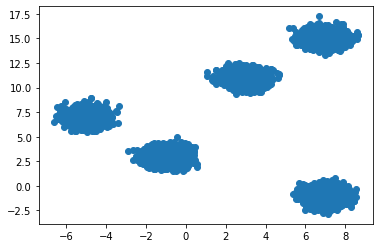

Test file generated with Name: input.csv, k: 5, N: 10000


In [4]:
generateTestFile(k = 5, N = 10000)

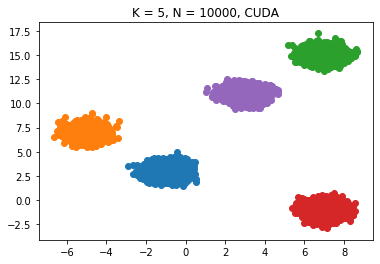

In [5]:
displayResult(k = 5, CUDA=True)

# Plotting Results

In [6]:
cpp_time = [0, 0, 11, 54, 552, 7336, 49825]
cuda_time = [86, 97, 102, 83, 112, 337, 2499]
t_axis = [10, 100, 1000, 10000, 100000, 1000000, 10000000]

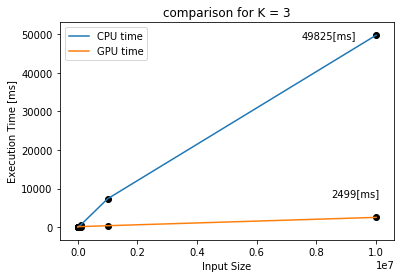

In [7]:
plt.plot(t_axis, cpp_time, label="CPU time")
plt.plot(t_axis, cuda_time, label="GPU time")
plt.scatter(t_axis, cpp_time, color='black')
plt.scatter(t_axis, cuda_time, color='black')
plt.text(0.85e+7, 8000, "2499[ms]")
plt.text(0.75e7, 49000, "49825[ms]")
plt.xlabel("Input Size")
plt.ylabel("Execution Time [ms]")
plt.legend()
plt.title("comparison for K = 3")
plt.show()

In [8]:
cpp_time = [0, 13, 65, 797, 6486, 114147]
cuda_time = [95, 95, 95, 101, 291, 2000]
t_axis = [100, 1000, 10000, 100000, 1000000, 10000000]

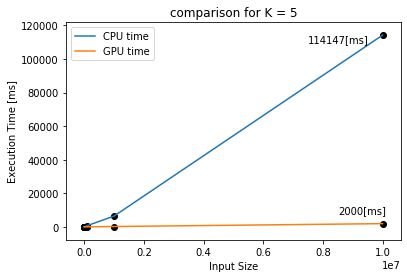

In [9]:
plt.plot(t_axis, cpp_time, label="CPU time")
plt.plot(t_axis, cuda_time, label="GPU time")
plt.scatter(t_axis, cpp_time, color='black')
plt.scatter(t_axis, cuda_time, color='black')
plt.text(0.85e+7, 8000, "2000[ms]")
plt.text(0.75e7, 110000, "114147[ms]")
plt.xlabel("Input Size")
plt.ylabel("Execution Time [ms]")
plt.legend()
plt.title("comparison for K = 5")
plt.show()

In [10]:
cpp_time = [3, 23, 183, 1682, 17737, 258130]
cuda_time = [103, 88, 99, 130, 437, 3878]
t_axis = [100, 1000, 10000, 100000, 1000000, 10000000]

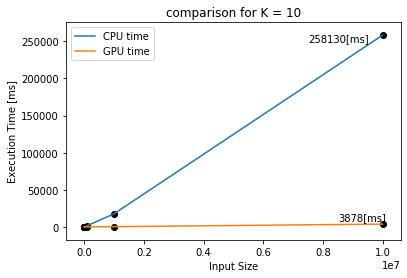

In [11]:
plt.plot(t_axis, cpp_time, label="CPU time")
plt.plot(t_axis, cuda_time, label="GPU time")
plt.scatter(t_axis, cpp_time, color='black')
plt.scatter(t_axis, cuda_time, color='black')
plt.text(0.85e+7, 9000, "3878[ms]")
plt.text(0.75e7, 250000, "258130[ms]")
plt.xlabel("Input Size")
plt.ylabel("Execution Time [ms]")
plt.legend()
plt.title("comparison for K = 10")
plt.show()